In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

# Загрузка данных из Excel файла
df = pd.read_excel('/content/Raisin_Dataset.xlsx')

# Вывод первых нескольких строк датафрейма
print(df.head())

# Статистическая информация
print(df.describe())

# Названия столбцов
print("Названия столбцов:", df.columns)

# Названия строк (индексы)
print("Названия строк:", df.index)

    Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0  87524       442.246011       253.291155      0.819738       90546   
1  75166       406.690687       243.032436      0.801805       78789   
2  90856       442.267048       266.328318      0.798354       93717   
3  45928       286.540559       208.760042      0.684989       47336   
4  79408       352.190770       290.827533      0.564011       81463   

     Extent  Perimeter    Class  
0  0.758651   1184.040  Kecimen  
1  0.684130   1121.786  Kecimen  
2  0.637613   1208.575  Kecimen  
3  0.699599    844.162  Kecimen  
4  0.792772   1073.251  Kecimen  
                Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
count     900.000000       900.000000       900.000000    900.000000   
mean    87804.127778       430.929950       254.488133      0.781542   
std     39002.111390       116.035121        49.988902      0.090318   
min     25387.000000       225.629541       143.710872      0.348730   
25%

In [2]:
# Разделите данные на признаки (X) и целевую переменную (y)
X = df.drop('Class', axis=1)
y = df['Class']

# Преобразуйте целевую переменную в числовой формат
y = pd.get_dummies(y).values

# Разделите данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Масштабируйте данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

# Определите входные данные
input_dim = X_train_scaled.shape[1]
encoding_dim = 10

# Создайте автоэнкодер
input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Создайте модель автоэнкодера
autoencoder = Model(input_layer, decoded)

# Компиляция модели
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Обучение модели
autoencoder.fit(X_train_scaled, X_train_scaled, epochs=100, batch_size=128, verbose=0)

In [5]:
import numpy as np
# Извлечение признаков из автоэнкодера
encoder = Model(input_layer, encoded)

# Извлечение признаков для обучающей и тестовой выборок
X_train_features = encoder.predict(X_train_scaled)
X_test_features = encoder.predict(X_test_scaled)

# Импорт библиотеки для классификации
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Создание классификатора
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Обучение классификатора
clf.fit(X_train_features, np.argmax(y_train, axis=1))

# Классификация тестовой выборки
y_pred = clf.predict(X_test_features)

# Оценка точности классификатора
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred)
print('Точность классификатора:', accuracy)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Точность классификатора: 0.85


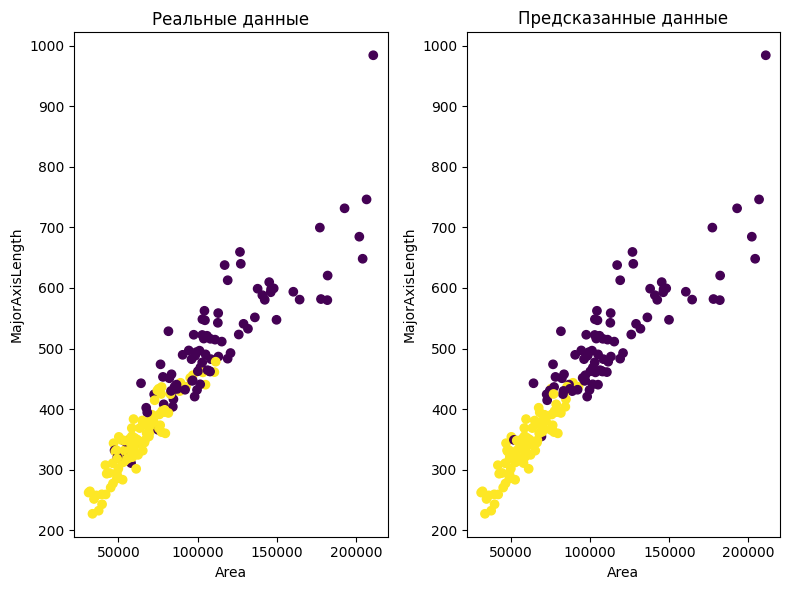

In [12]:
# Визуализация ошибок классификации
plt.figure(figsize=(8, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_test['Area'], X_test['MajorAxisLength'], c=np.argmax(y_test, axis=1))
plt.xlabel('Area')
plt.ylabel('MajorAxisLength')
plt.title('Реальные данные')

plt.subplot(1, 2, 2)
plt.scatter(X_test['Area'], X_test['MajorAxisLength'], c=y_pred)
plt.xlabel('Area')
plt.ylabel('MajorAxisLength')
plt.title('Предсказанные данные')

plt.tight_layout()
plt.show()

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Преобразование данных в тензоры
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Создание DataLoader
train_loader = DataLoader(TensorDataset(X_train_tensor, X_train_tensor), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, X_test_tensor), batch_size=1, shuffle=False)

# Определение архитектуры автоэнкодера
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(X_train.shape[1], 14),
            nn.Tanh(),
            nn.Linear(14, 7),
            nn.LeakyReLU(),
        )

        self.decoder = nn.Sequential(
            nn.Linear(7, 14),
            nn.Tanh(),
            nn.Linear(14, X_train.shape[1]),
            nn.LeakyReLU()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Создание модели
model = Autoencoder()

# Определение функции потерь и оптимизатора
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

# Обучение автоэнкодера
num_epochs = 100
history = {'train_loss': [], 'test_loss': []}

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for data, _ in train_loader:
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, data)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    history['train_loss'].append(train_loss)

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for data, _ in test_loader:
            output = model(data)
            loss = criterion(output, data)
            test_loss += loss.item()
    test_loss /= len(test_loader)
    history['test_loss'].append(test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Сохранение модели
torch.save(model.state_dict(), './autoencoder_model.pth')

# Извлечение признаков с помощью обученного автоэнкодера
model.eval()
with torch.no_grad():
    X_train_encoded = model.encoder(X_train_tensor).numpy()
    X_test_encoded = model.encoder(X_test_tensor).numpy()

# Обучение классификатора на извлеченных признаках
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_encoded, y_train)

# Оценка точности модели на тестовой выборке
y_pred = classifier.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Epoch [1/100], Train Loss: 1.0299, Test Loss: 0.9241
Epoch [2/100], Train Loss: 0.9827, Test Loss: 0.8619
Epoch [3/100], Train Loss: 0.9035, Test Loss: 0.7861
Epoch [4/100], Train Loss: 0.7788, Test Loss: 0.6572
Epoch [5/100], Train Loss: 0.6631, Test Loss: 0.5912
Epoch [6/100], Train Loss: 0.6027, Test Loss: 0.5579
Epoch [7/100], Train Loss: 0.5719, Test Loss: 0.5307
Epoch [8/100], Train Loss: 0.5473, Test Loss: 0.5124
Epoch [9/100], Train Loss: 0.5309, Test Loss: 0.4991
Epoch [10/100], Train Loss: 0.5199, Test Loss: 0.4892
Epoch [11/100], Train Loss: 0.5113, Test Loss: 0.4823
Epoch [12/100], Train Loss: 0.5040, Test Loss: 0.4771
Epoch [13/100], Train Loss: 0.5026, Test Loss: 0.4720
Epoch [14/100], Train Loss: 0.4945, Test Loss: 0.4676
Epoch [15/100], Train Loss: 0.4897, Test Loss: 0.4631
Epoch [16/100], Train Loss: 0.4873, Test Loss: 0.4586
Epoch [17/100], Train Loss: 0.4821, Test Loss: 0.4546
Epoch [18/100], Train Loss: 0.4748, Test Loss: 0.4514
Epoch [19/100], Train Loss: 0.4728, T

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Преобразование данных в тензоры
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)

# Создание DataLoader
train_loader = DataLoader(TensorDataset(X_train_tensor, X_train_tensor), batch_size=32, shuffle=True)
test_loader = DataLoader(TensorDataset(X_test_tensor, X_test_tensor), batch_size=1, shuffle=False)

# Определение архитектуры автоэнкодера
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(X_train.shape[1], 14),
            nn.Tanh(),
            nn.Linear(14, 7),
            nn.LeakyReLU(),
        )

        self.decoder = nn.Sequential(
            nn.Linear(7, 14),
            nn.Tanh(),
            nn.Linear(14, X_train.shape[1]),
            nn.LeakyReLU()
        )

        self.classifier = nn.Sequential(
            nn.Linear(7, 2),
            nn.Softmax(dim=1)
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        x = self.classifier(x)
        return x

# Создание модели
model = Autoencoder()

# Определение функции потерь и оптимизатора
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-5)

# Обучение автоэнкодера
num_epochs = 100
history = {'train_loss': [], 'test_loss': []}

for epoch in range(num_epochs):
    model.train()
    train_loss = 0.0
    for i, (data, _) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, torch.tensor(y_train[i*32:(i+1)*32], dtype=torch.float32))
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_loss /= len(train_loader)
    history['train_loss'].append(train_loss)

    model.eval()
    test_loss = 0.0
    with torch.no_grad():
        for i, (data, _) in enumerate(test_loader):
            output = model(data)
            loss = criterion(output, torch.tensor([y_test[i]], dtype=torch.float32))
            test_loss += loss.item()
    test_loss /= len(test_loader)
    history['test_loss'].append(test_loss)

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}')

# Сохранение модели
torch.save(model.state_dict(), './autoencoder_model.pth')

# Извлечение признаков с помощью обученного автоэнкодера
model.eval()
with torch.no_grad():
    X_train_encoded = model.encoder(X_train_tensor).numpy()
    X_test_encoded = model.encoder(X_test_tensor).numpy()

# Обучение классификатора на извлеченных признаках
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_encoded, y_train)

# Оценка точности модели на тестовой выборке
y_pred = classifier.predict(X_test_encoded)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

<ipython-input-48-c8fc34ba54cb>:87: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:278.)
  loss = criterion(output, torch.tensor([y_test[i]], dtype=torch.float32))


Epoch [1/100], Train Loss: 0.6936, Test Loss: 0.6907
Epoch [2/100], Train Loss: 0.6935, Test Loss: 0.6916
Epoch [3/100], Train Loss: 0.6933, Test Loss: 0.6914
Epoch [4/100], Train Loss: 0.6934, Test Loss: 0.6920
Epoch [5/100], Train Loss: 0.6936, Test Loss: 0.6927
Epoch [6/100], Train Loss: 0.6933, Test Loss: 0.6935
Epoch [7/100], Train Loss: 0.6933, Test Loss: 0.6940
Epoch [8/100], Train Loss: 0.6934, Test Loss: 0.6942
Epoch [9/100], Train Loss: 0.6932, Test Loss: 0.6938
Epoch [10/100], Train Loss: 0.6933, Test Loss: 0.6931
Epoch [11/100], Train Loss: 0.6934, Test Loss: 0.6928
Epoch [12/100], Train Loss: 0.6934, Test Loss: 0.6926
Epoch [13/100], Train Loss: 0.6934, Test Loss: 0.6932
Epoch [14/100], Train Loss: 0.6934, Test Loss: 0.6927
Epoch [15/100], Train Loss: 0.6932, Test Loss: 0.6928
Epoch [16/100], Train Loss: 0.6932, Test Loss: 0.6930
Epoch [17/100], Train Loss: 0.6933, Test Loss: 0.6928
Epoch [18/100], Train Loss: 0.6935, Test Loss: 0.6934
Epoch [19/100], Train Loss: 0.6934, T

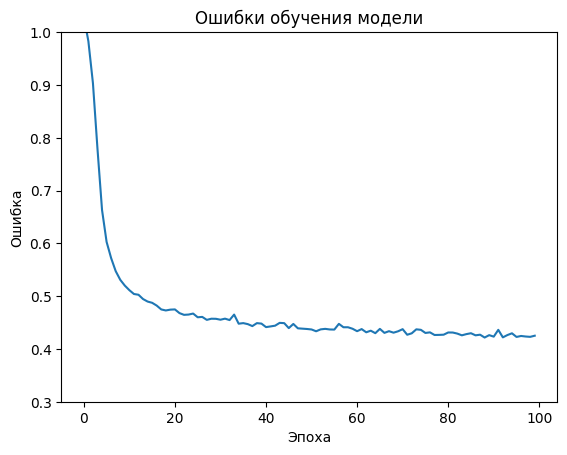

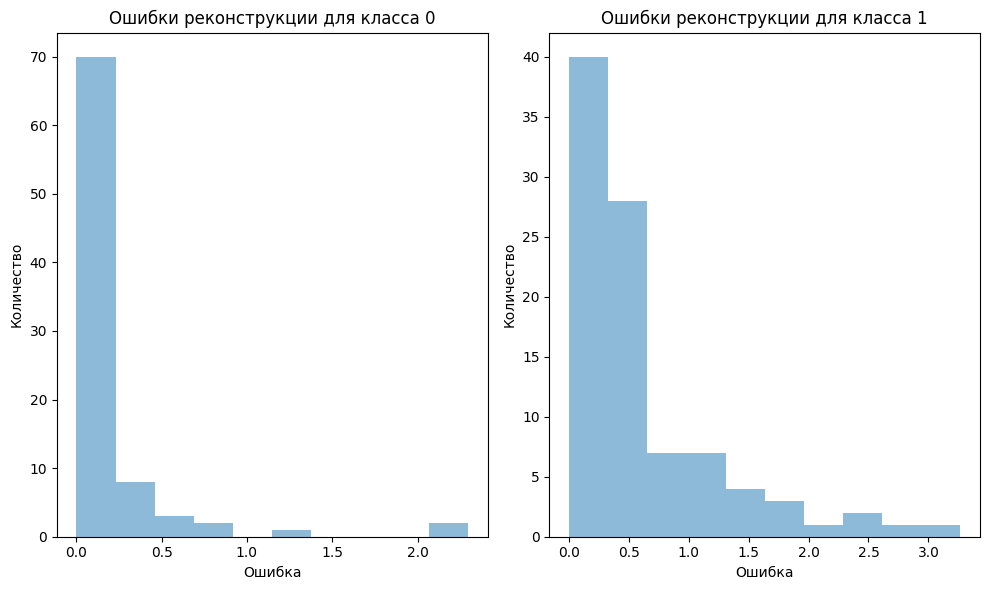

In [43]:
plt.plot(history['train_loss'])
plt.title('Ошибки обучения модели')
plt.ylabel('Ошибка')
plt.xlabel('Эпоха')
plt.ylim([0.3, 1])  # установить диапазон для оси Y
plt.show()

# Визуализация ошибки реконструкции на тестовых данных
pred_losses = {'pred_loss' : []}
model.eval()
with torch.no_grad():
    for data in test_loader:
        inputs, _ = data  # Разберите кортеж на два тензора
        outputs = model(inputs)
        loss = criterion(outputs, inputs).data.item()
        pred_losses['pred_loss'].append(loss)

reconstructionErrorDF = pd.DataFrame(pred_losses)
reconstructionErrorDF['Class'] = np.argmax(y_test, axis=1)

# Визуализация ошибки реконструкции для каждого класса
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
normal_error_df = reconstructionErrorDF[(reconstructionErrorDF['Class']== 0)]
plt.hist(normal_error_df['pred_loss'].values, bins=10, alpha=0.5, label='Класс 0')
plt.title('Ошибки реконструкции для класса 0')
plt.xlabel('Ошибка')
plt.ylabel('Количество')

plt.subplot(1, 2, 2)
fraud_error_df = reconstructionErrorDF[(reconstructionErrorDF['Class']== 1)]
plt.hist(fraud_error_df['pred_loss'].values, bins=10, alpha=0.5, label='Класс 1')
plt.title('Ошибки реконструкции для класса 1')
plt.xlabel('Ошибка')
plt.ylabel('Количество')
plt.tight_layout()
plt.show()

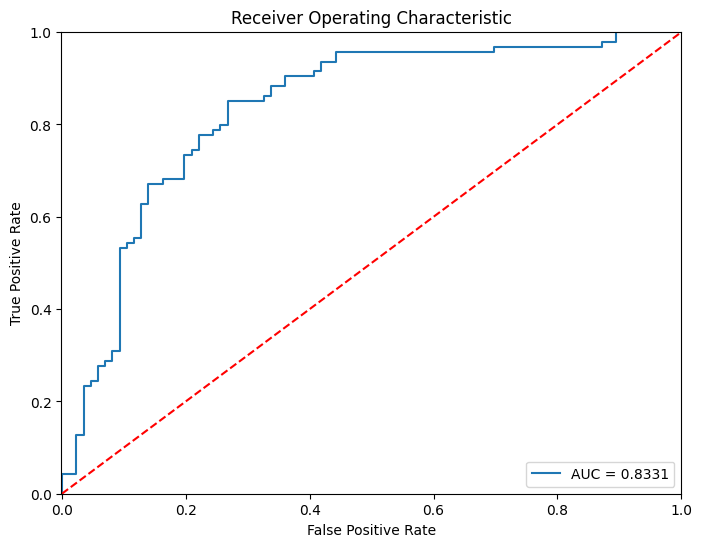

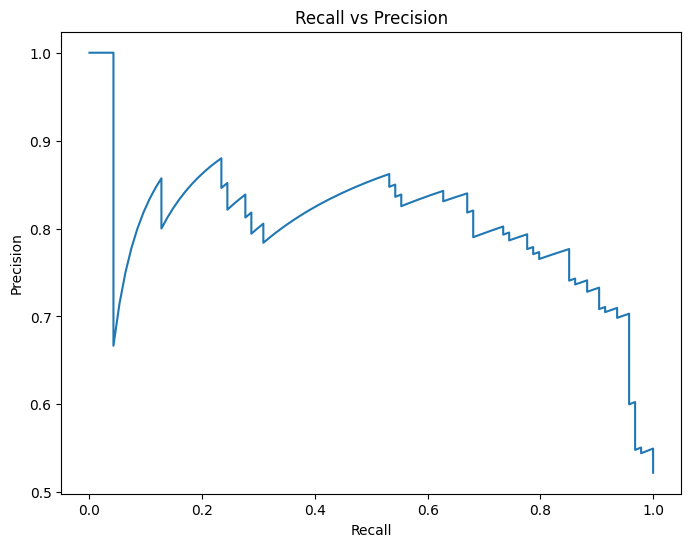

In [44]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# ROC-кривая
fpr, tpr, thresholds = roc_curve(reconstructionErrorDF['Class'], reconstructionErrorDF['pred_loss'])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='AUC = %0.4f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.show()

# Кривая Precision vs Recall
precision, recall, th = precision_recall_curve(reconstructionErrorDF['Class'], reconstructionErrorDF['pred_loss'])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

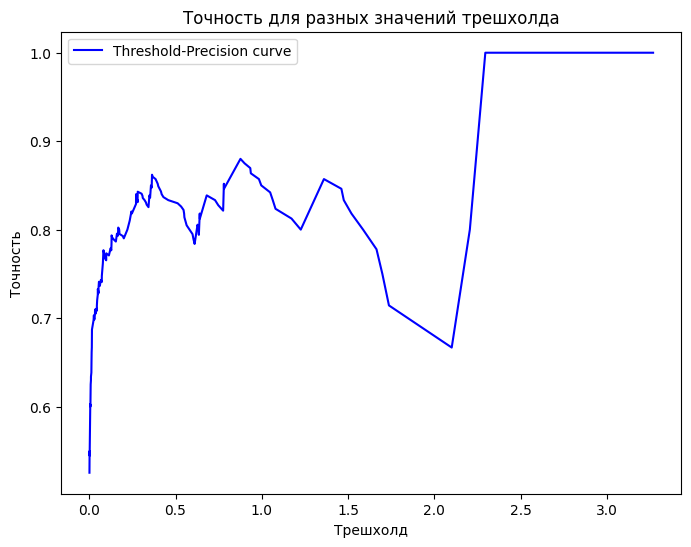

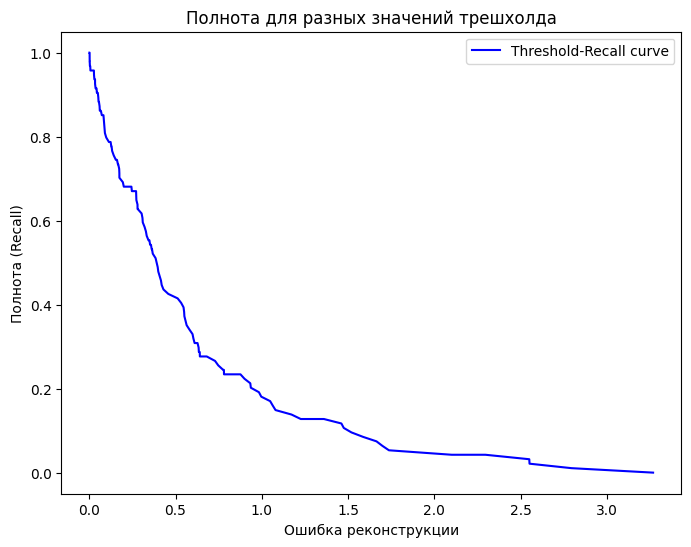

In [45]:
# Точность для разных значений трешхолда
plt.figure(figsize=(8, 6))
plt.plot(th, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Точность для разных значений трешхолда')
plt.xlabel('Трешхолд')
plt.ylabel('Точность')
plt.legend()
plt.show()

# Полнота для разных значений трешхолда
plt.figure(figsize=(8, 6))
plt.plot(th, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Полнота для разных значений трешхолда')
plt.xlabel('Ошибка реконструкции')
plt.ylabel('Полнота (Recall)')
plt.legend()
plt.show()

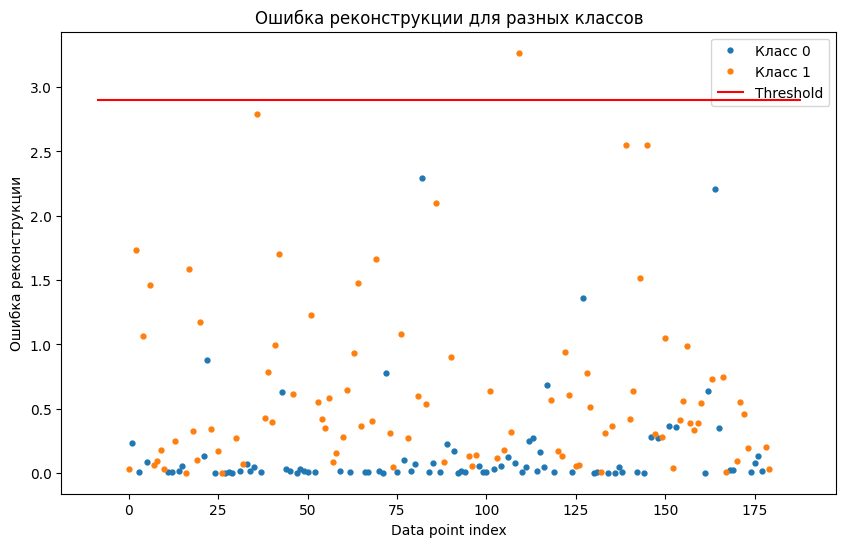

<ipython-input-46-726ec22f0dd8>:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('Blues'));


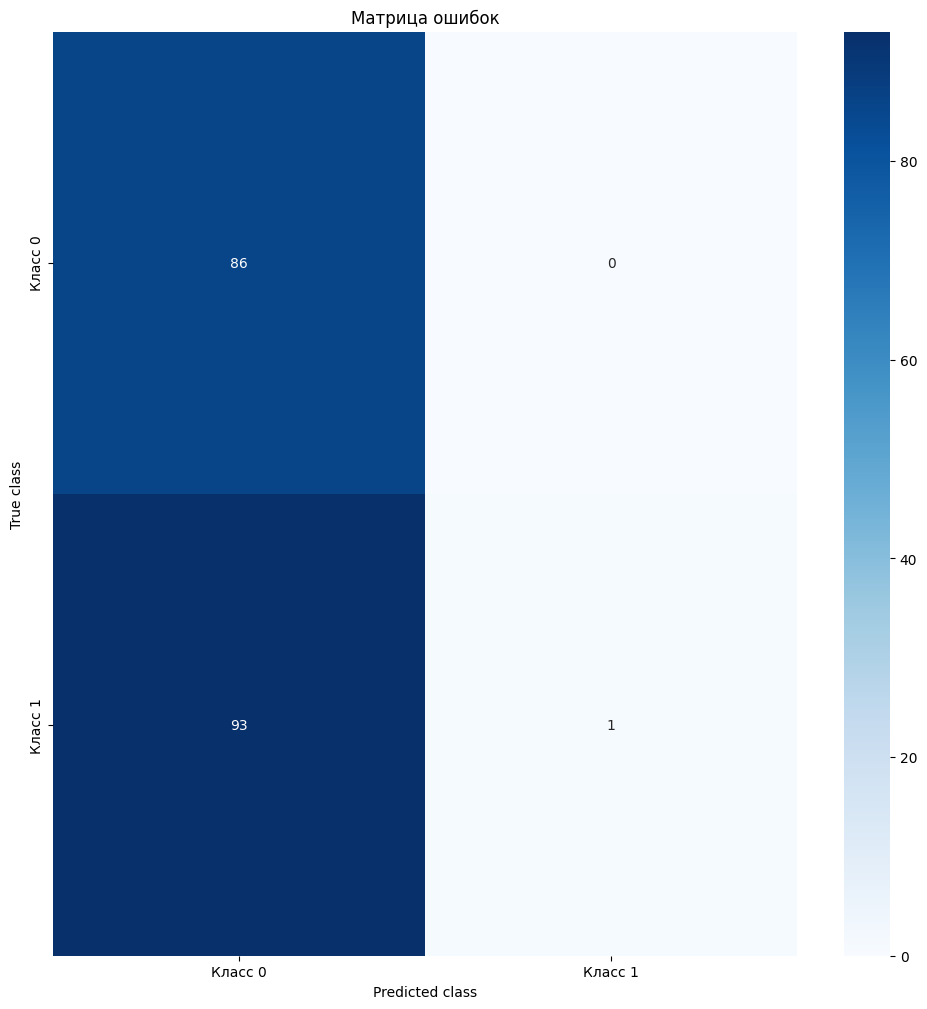

In [46]:
threshold = 2.9

# Ошибка реконструкции для разных классов
groups = reconstructionErrorDF.groupby('Class')
fig, ax = plt.subplots(figsize=(10, 6))
for name, group in groups:
    ax.plot(group.index, group.pred_loss, marker='o', ms=3.5, linestyle='',
            label=f"Класс {name}")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Ошибка реконструкции для разных классов")
plt.ylabel("Ошибка реконструкции")
plt.xlabel("Data point index")
plt.show();

# Матрица ошибок
y_pred = [1 if e > threshold else 0 for e in reconstructionErrorDF.pred_loss.values]
conf_matrix = confusion_matrix(reconstructionErrorDF.Class, y_pred)
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=["Класс 0", "Класс 1"], yticklabels=["Класс 0", "Класс 1"], annot=True, fmt="d",
            cmap=plt.cm.get_cmap('Blues'));
plt.title("Матрица ошибок")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()